# (실습) 고전 컴퓨터 비전 - 기초 실습



## 실습 개요
1) 실습 목적

이번 실습에서는 OpenCV Library에서 Morphological transform의 대표적인 커널을 불러와 보게 됩니다. 대표적인 erosion 커널과 dilation 커널을 이용하여 각 커널을 거칠 때 어떤 출력값을 가지게 되는지를 직접 확인해보는 과정을 통해서 커널에 대한 이해를 높일 수 있습니다.

2) 수강 목표
- OpenCV Library를 활용하여 Erosion kernel을 구현할 수 있다.
- OpenCV Library를 활용하여 Dilation kernel을 구현할 수 있다.

### 실습 목차
* 1. GitHub 저장소를 이용해 이미지 Import 실습
  * 1-1. GitHub 저장소에서 이미지 불러오기

* 2. OpenCV Library를 이용한 Erosion 실습
  * 2-1. OpenCV Library를 활용하여 Erosion 커널 구현 및 입출력 비교하기

* 3. OpenCV Library를 이용한 Dilation 실습
  * 3-1. OpenCV Library를 활용하여 Dilation 커널 구현 및 입출력 비교하기

### 환경 설정

- 패키지 설치 및 임포트

In [1]:
!pip3 install opencv-python==4.8.0.76  # 이미지 처리를 위한 라이브러리
!pip3 install numpy==1.23.5  # 다차원 배열 및 수치 계산을 위한 라이브러리
!pip3 install matplotlib==3.7.1 # 시각화를 위한 라이브러리

In [2]:
import cv2 # 이미지 처리를 위한 라이브러리
import numpy as np # 다차원 배열 형태의 데이터에 관한 라이브러리
import matplotlib.pyplot as plt # 이미지를 시각화하기위한 라이브러리


## 1. GitHub 저장소를 이용해 이미지 Import 실습

```
💡 목차 개요: GitHub 저장소에서 이미지를 Colab으로 불러오는 방법을 알아본다
```

- 1-1. GitHub 저장소에서 이미지 불러오기

### 1-1 GitHub 저장소에서 이미지 불러오기

> `GitHub` 저장소는 이미지 뿐만 아니라 코드 등을 함께 불러올 수 있습니다



#### 📝 설명: GitHub 저장소에서 이미지 불러오기
`!wget`커맨드를 사용하면 GitHub 저장소에서 원하는 image를 불러올 수 있습니다

- `!wget [원하는 주소]`
- `!wget https://raw.githubusercontent.com/BupyeongHealer/sample-image/fc0b8f8ccf7009d81e44c2fe794a17c9c6381348/logo-font.jpg`
- ..



📚 참고할만한 자료:
* [Github 공식 문서](https://docs.github.com/ko): 이미 완성된 코드 및 이미지 등을 불러올 수 있으며, 코드 버전 관리에 있어 유용하게 사용 가능합니다.

In [3]:
# GitHub 저장소에서 Colab으로 이미지를 불러옵니다
!wget https://raw.githubusercontent.com/BupyeongHealer/sample-image/fc0b8f8ccf7009d81e44c2fe794a17c9c6381348/logo-font.jpg

--2024-01-29 08:35:38--  https://raw.githubusercontent.com/BupyeongHealer/sample-image/fc0b8f8ccf7009d81e44c2fe794a17c9c6381348/logo-font.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41866 (41K) [image/jpeg]
Saving to: ‘logo-font.jpg’

logo-font.jpg       100%[===================>]  40.88K  --.-KB/s    in 0.01s   

2024-01-29 08:35:38 (3.45 MB/s) - ‘logo-font.jpg’ saved [41866/41866]



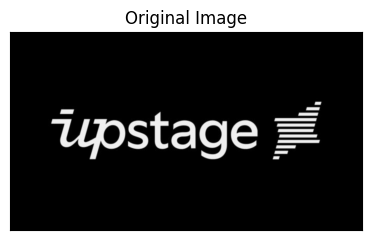

In [4]:
# 불러온 이미지를 입력값으로 가져옵니다
image = cv2.imread('logo-font.jpg')  # 'logo-font.jpg' 이미지를 불러옵니다.
image = ~cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # BGR을 Grayscale 이미지로 변환 후 0/1 값을 반전합니다.

# 원본 이미지를 시각화합니다
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')  # 이미지를 표시하며, 흑백 색상으로 설정합니다.
plt.title('Original Image')  # 제목을 설정합니다.
plt.xticks([]), plt.yticks([])  # x축 및 y축 눈금을 표시하지 않습니다.
plt.show()  # 시각화를 표시합니다.

## 2. OpenCV Library를 이용한 Erosion 실습

```
💡 목차 개요: Morphological transform 커널인 Erosion 커널을 OpenCV Library에서 불러온 뒤 입력과 출력의 차이를 알아본다
```

- 2-1. OpenCV Library를 활용하여 Erosion 커널 구현 및 입출력 비교하기

### 2-1 OpenCV Library를 활용하여 Erosion 커널 구현 및 입출력 비교하기

> OpenCV Library를 활용해 Erosion 커널을 구현합니다. 입력이미지를 커널로 처리했을 때, 출력이미지가 어떻게 달라지는지 알아봅니다.

📚 참고할만한 자료:
* [OpenCV 공식 문서](https://opencv.org/): 이미지 처리를 위한 알고리즘을 불러올 수 있으며, 입력 이미지를 손쉽게 처리하는데 유용하게 사용 가능합니다.

In [5]:
# Erosion 연산에 사용할 커널 정의
kernel = np.ones((5, 5), np.uint8)  # 5x5 크기의 모든 요소가 1인 커널 생성

# Erosion 연산 수행
erosion_result = cv2.erode(image, kernel, iterations=1)  # 이미지에 커널을 사용하여 Erosion 연산을 수행

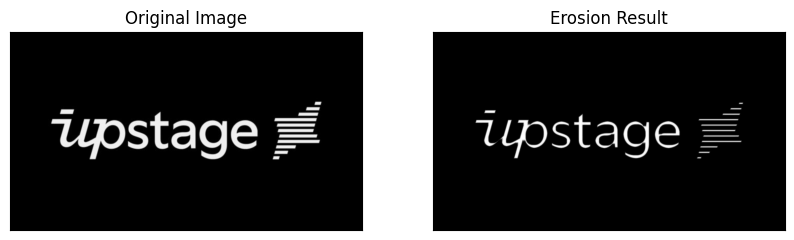

In [6]:
# 원본 이미지와 침식된 이미지를 플롯합니다.
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')  # 원본 이미지를 표시합니다.
plt.title('Original Image')  # 그래프 제목을 'Original Image'로 설정합니다.
plt.xticks([]), plt.yticks([])  # x축 및 y축의 눈금을 표시하지 않습니다.

plt.subplot(122)
plt.imshow(erosion_result, cmap='gray')  # 침식 결과 이미지를 표시합니다.
plt.title('Erosion Result')  # 그래프 제목을 'Erosion Result'로 설정합니다.
plt.xticks([]), plt.yticks([])  # x축 및 y축의 눈금을 표시하지 않습니다.

plt.show()  # 시각화를 표시합니다

## 3. OpenCV Library를 이용한 Dilation 실습

```
💡 목차 개요: Morphological transform 커널인 Dilation 커널을 OpenCV Library에서 불러온 뒤 입력과 출력의 차이를 알아본다
```

- 3-1. OpenCV Library를 활용하여 Dilation 커널 구현 및 입출력 비교하기

### 3-1 OpenCV Library를 활용하여 Dilation 커널 구현 및 입출력 비교하기

> OpenCV Library를 활용해 Dilation 커널을 구현합니다.입력이미지를 커널로 처리했을 때, 출력이미지가 어떻게 달라지는지 알아봅니다.



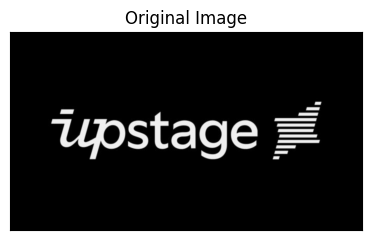

In [7]:
# 불러온 이미지를 입력값으로 가져옵니다
image = cv2.imread('logo-font.jpg')  # 'logo-font.jpg' 이미지를 불러옵니다.
image = ~cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # BGR을 Grayscale 이미지로 변환 후 0/1 값을 반전합니다.

# 원본 이미지를 시각화합니다
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')  # 이미지를 표시하며, 흑백 색상으로 설정합니다.
plt.title('Original Image')  # 제목을 설정합니다.
plt.xticks([]), plt.yticks([])  # x축 및 y축 눈금을 표시하지 않습니다.
plt.show()  # 시각화를 표시합니다.

In [8]:
# Dilation 연산에 사용할 커널 정의
kernel = np.ones((5, 5), np.uint8)

# Dilation 연산 수행
dilation_result = cv2.dilate(image, kernel, iterations=1)

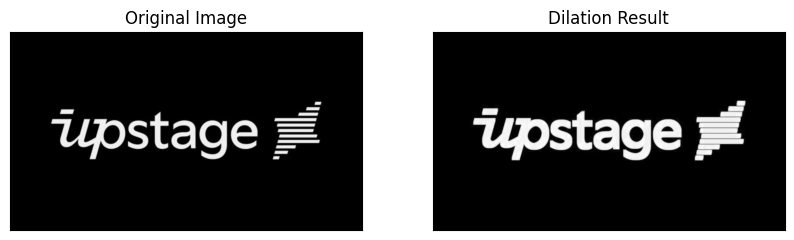

In [9]:
# 원본 이미지와 팽창된 이미지를 플롯합니다.
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')  # 원본 이미지를 표시합니다.
plt.title('Original Image')  # 그래프 제목을 'Original Image'로 설정합니다.
plt.xticks([]), plt.yticks([])  # x축 및 y축의 눈금을 표시하지 않습니다.

plt.subplot(122)
plt.imshow(dilation_result, cmap='gray')  # 침식 결과 이미지를 표시합니다.
plt.title('Dilation Result')  # 그래프 제목을 'Dilation Result'로 설정합니다.
plt.xticks([]), plt.yticks([])  # x축 및 y축의 눈금을 표시하지 않습니다.

plt.show()  # 시각화를 표시합니다

### Reference
#Reference
- <a href='https://docs.github.com/ko'>Github 공식 문서</a>
- <a href='https://opencv.org/'>OpenCV 공식 문서</a>

credits:
- 이미지: Upstage 회사 로고



## Required Package

> opencv-python == 4.8.0.76

> numpy == 1.23.5

> matplotlib == 3.7.1